<h2>Recurrent neural network (RNN)</h2>
<p>Recurrent neural networks are the class of neural network which involves sequential data and remembers its input due to its internal memory. RNN is the algorithm for sequential data used by Apple's Siri and Google's voice search. Rnn is powerful for modelling sequence data such as time series or natural language. Rnn layer uses a for loop to iterate over the timestamps of a sequence, while maintaining an internal state that encodes information about the timestamps it has been so far.<br>
The Keras RNN API is designed with a focus on:<br>
<ul><li><b>Ease of use: </b> The keras built in layers like <i>keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU</i> will enble us to easily and quickly build the RNN models without having to make diffucult configurations.</li>
<li><b>Ease of customization: </b> It is possible to define our own RNN cell layer which is the inner part of far loop with custo behaviour and use it with generic keras.layers.RNN layer (It is the for loop). This process will allow us to quickly prototype different ideas in a flexible way with minimal code.</li></ul>

In [1]:
#Importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h3>Built-in RNN layers: a simple example</h3>
<p>There are three built-in RNN layers in Keras, they are:</p>
<ul><li><b>keras.layers.SimpleRNN </b> It is a fully-connected RNN where the output from previous timestep is passed to next timestep </li>
<li><b>keras.layers.GRU </b> Gated Recurrent Unit will got rid of the cell state and use the hidden state to tranfer information. It is similar to LSTM.</li>
<li><b>keras.layers.LSTM </b> Long Short Term Memory are special kind of RNN layer which deals with the long term dependency problem.</li> </ul>
<p>In early 2015, Keras had the first reusable open-source Python implementations of LSTM and GRU. In the below example, we are using Sequential model that process sequence of integers, embeds each integer into 64-dimensional vector, then process the sequence of vectors using a LSTM layer.</p>

In [2]:
# Defining the sequential model
model = keras.Sequential()

# Adding an Embedding layer, it will expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Adding a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Adding a Dense layer with 10 units.
model.add(layers.Dense(10))

# Displaying the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


<p>Built-in RNN in keras will support number of useful features they are:</p>
<ul><li>Recurrent dropout, via the <b>dropout and recurrent_dropout</b> arguments.</li>
<li>Ability to process an input sequence in reverse, via the <b>go_backwards </b>argument.</li>
<li>Loop unrolling (which can lead to large speedup when processing short sequences on CPU). This process carried via the <b>unroll arguement</b>.</li>
<li>and more features .....</li></ul>

<h3>Output and States</h3>
<p>The output of RNN layer, by default, contains single vector per sample. This vector is the RNN cell output corresponding to the last timestep. This laststep contains information about the entire input sequence. The shape of this output is <b>(batch_size, units)</b>. These units corresponds to the units argument passed to the layer's constructor.<br>
A RNN layer can also return the entire sequence of outputs for each sample( one vector per timestep), if you set <b>return_sequences=True</b>. The shape of resulting output is <b>(batch_size, timesteps, units)</b>.</p>

In [3]:
# Defining the sequential model
model = keras.Sequential()

# Adding embedding layer with input 1000 and output 64-dimensions
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

# Adding dense layer with 10 units
model.add(layers.Dense(10))

#Displaying the summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


<p>The RNN layer can return its final internal state. These returned states can be used to resume the RNN execution later or we can initialize another RNN. This settings are commonly used in encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.<br>
To return internal state of RNN layer, we have to set <b>the return_state</b> parameter to True, when creating the RNN layer. The LSTM has 2 state tensors but GRU has only one. <b>initial_state</b> keyword argument is used to set the initial state of the layer. The shape of the state needs to match the unit size of the layer. An example given below.</p>

In [4]:
# Specifying the encoder and decoder vocab
encoder_vocab = 1000
decoder_vocab = 2000

#Adding input and embedding layer for encode
encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

#Adding input and embedding layer for decode
decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)

# Adding dense layer with 10 units and decoder_output
output = layers.Dense(10)(decoder_output)

# Creating keras model with encoder, decoder inputs and output
model = keras.Model([encoder_input, decoder_input], output)

#Displaying the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________

<h3>RNN layers and RNN cells</h3>
<p> We have seen built-in RNN layers, in addition to that RNN API also provides cell-level APIs. These RNN cells only processes a single timestep where the RNN layers processes whole batches of input sequences. The cell is present inside the for loop of a RNN layer. These wrapping a cell inside a keras.layers.RNN layer gives us the layer capable of processing batches of sequences. For example, <b>RNN(LSTMcell(10))</b> RNN is a layer and LSTMcell is cell of 10 units.<br>
RNN(LSTMcell(10)) and LSTM(10) both will produce the same result. In fact, the implementation of this layer in TensorFlow v1.x was just creating the corresponding RNN cell and wrapping it in a RNN layer. Built-in layers GRU and LSTM, using these enable the use cuDNN (which will be discussed later), the performance is better.<br>
There are 3 built-in RNN cells, each of them corresponding to matching RNN layer. They are:<p>
<ul><li>keras.layers.SimpleRNNcell: it corresponds to SimpleRNN layer.</li>
<li>keras.layers.GRUcell: it corresponds to GRU layer.</li>
<li>keras.layers.LSTMcell: it corresponds to LSTM layer.</li></ul>
<p>With the generic keras.layers.RNN class and the cell abstraction, makes very easy to implement custom RNN architecture for the researches.</p>

<h3>Cross-batch statefulness</h3>
<p> We use the pattern of cross-batch statefulness when processing very long sequences (may be infinite). Every time when RNN layers sees a new batch, it reset its internal state. (New batch is every sample seen by the layer is assumed to be independent of the past). The RNN layer will only maintain a state while processing a given sample.<br>
If we have long sequences, it is best to divide them into shorter sequences. These shorter sequences fed into RNN layer sequentially without resetting the layer's state. In this way, the layer can retain information about the entirety of the sequence, even though it's only seeing one sub-sequence at a time.<br>
The above process can be done by setting <b>stateful = True</b> in the constructor. For example, we have a sequence s = [t0, t1, t2, ....t1500, t1501], it can be splitted like below:<br></p>

```
s1 = [t0, t1, ... t100]
s2 = [t101, ... t201]
...
s16 = [t1501, ... t1547]
```
<br> 
<p>Then we will process the above sequence. </p><br>

```
lstm_layer = layers.LSTM(64, stateful=True)
for s in sub_sequences:
  output = lstm_layer(s)
```
<p>For clearing the state, we use <b>layer.reset_states()</b></p>



In [5]:
# complete example for  the cross batch statefulness
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

# processing the sequence
lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()

<h4>RNN State Reuse</h4>
<p> RNN states are reused from the RNN layer by retrieve the states value by <b>layer.states</b> and use it as the initial state for a new layer via the Keras functional API <b>
new_layer(inputs, initial_state = layer.states)</b>
or model subclassing. The recorded states of RNN layer not included in layer.weights().<br>
Here in this example, we are not using the Sequential model because it only supports layerswith single input and output, the extra input of initial state makes it impossible to use here.</p> 

In [6]:
# The data generated by numpy
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

# Adding LSTM layer to the data
lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

# Accessing the existing state
existing_state = lstm_layer.states

# Building the new LSTM layer 
new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

<h3>Bidirectional RNN<h3>
<p> For sequence data other than time series (like Text), it is often the case that a RNN model can perform better. RNN model not only processes sequences start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only the words that come before it. Keras provides API to build such bidirectional RNN i.e <b>keras.layers.Bidirection</b> wrapper.  

In [7]:
# Creating the sequential model
model = keras.Sequential()

# Adding bidrectional layer to the model
model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)

#Adding another bidirectional layer
model.add(layers.Bidirectional(layers.LSTM(32)))

# Adding dense layer with 10 units
model.add(layers.Dense(10))

#Displaying the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


<p>Under the bidirectional hood will copy the RNN layer passed in, and flip the go_backwards field of the newly copied layer. So, it will process the input in reverse order. By default, the output of the Bidirectional RNN will be the concatenation of the forward layer output and the backward layer output. We can change the merging behaviour (For example, concatenation), by changing the <b>merge_mode</b> parameter in Bidirectional wrapper constructor.</p>

<h3>Performance optimization and CuDNN kernels</h3>
<p> In TensorFlow version 2.0, the built-in LSTM and GRU layers have been updated to leverage CuDNN kernels by defult when GPU is available. With this change, the prior <b>keras.layers.CuDNNLSTM/CuDNNGRU </b> layers have been deprecated, and we can build the model without worrying about the hardware where it will run. CUDA Deep Neural Network (cuDNN) is a GPU-accelerated library of primitives for DNN.<br>
Since the CuDNN kernel is built with certain assumptions, this means the layer will not be able to use the CuDNN kernel if we change the defaults of the built-in LSTM or GRU layers. Example:
<ul><li>Changing the activation function from tanh another function.</li>
<li>Changing the recurrent_activation function from sigmoid to another.</li>
<li>Using recurrent_dropout > 0</li>
<li>Setting the unroll to True, which will force LSTM or GRU to decompose the inner tf.while_loop into an unrolled for loop.</li>
<li>Setting use_bias to False.</li>
<li>Using msking when the input data is not strictly right padded (This is the most common case, if the mask corresponds to strictly right padded data, CuDNN can still be used.)</li></ul

<h4>Using available CuDNN kernels</h4>
<p> We build a simple LSTM model to demonstrate the performance difference. We are using MNIST dataset. The input sequences the sequence of rows of MNIST digits (treating each row of pixels as a timestep), and we will predict the digit's label.</p>

In [8]:
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
batch_size = 64

# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):

    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:

        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:

        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
        #Building the sequential model with normalization and dense layer
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [9]:
#Load the MNIST dataset of keras
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11493376/11490434 [==============================] - 0s 0us/step


<p>For our model, we will be using <b>sparse_categorical_crossentrophy</b> as the loss function. The output of the model has shape of <b>[batch_size, 10]</b>. The target of the model is an integer vector in the range 0 to 9.</p>

In [10]:
#Build the model by calling previously defined function
model = build_model(allow_cudnn_kernel=True)

#Compile the model with sgd optimizer
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

# Train the model using fit() function with 1 epoch
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 25s 24ms/step - loss: 1.2984 - accuracy: 0.5791 - val_loss: 0.5419 - val_accuracy: 0.8257


In [11]:
# Lets build the model that doesno use CuDNN kernel
# Building the model with setting allow_cudnn_kernel to false
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())

#Compile the model same as previous
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

#Train the model with 1 epoch
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 23s 23ms/step - loss: 0.4485 - accuracy: 0.8633 - val_loss: 0.2889 - val_accuracy: 0.9118


<p>The machine with NVIDIA GPU and CuDNN installed, while running. The model built with CuDNN is much faster to train compared to the model that uses regular TensorFlow Kernel. The same CuDNN-enabled model can also be used to run inference in a CPU-only environment. The <b>tf.device</b> annotation used below will just forcing the device placement. The model will run on CPU by defaultlly if there is no GPU available in the machine.<br>
We don't worry about the hardware we are running on anymore. 

Predicted result is: [3], target result is: 5


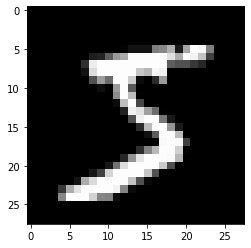

In [12]:
#Importing Matplotlib library for plotting
import matplotlib.pyplot as plt

# Using the tf.deice with CPU 0 value
with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

<h3>RNN with list/dict inputs or nested inputs</h3>
<p>The nested structures allow implementers to include more information within a single timmestep. The implementers can include branches like format in the inputs. For example, a video frame could have audio and video input at the same time. The data shape in this example will be:<br>
<b>[batch, timestep, {"video": [height, width, channel], "audio": [frequency]}]</b><br>
Handwriting data could have both coordinates x and y for the current position of the pen, as well as pressure information. The data structure will be:<br>
<b>[batch, timestep, {"location": [x, y], "pressure": [force]}]</b><br>
Here is an example to build the RNN cell that accepts nested inputs and making new layers and models via subclassing</p>

In [13]:
# Creating the class which extend keras.layers.Layer class
class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super(NestedCell, self).__init__(**kwargs)

    def build(self, input_shapes):
        # expect input_shape to contain 2 items, [(batch, i1), (batch, i2, i3)]
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(
            shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
        )
        self.kernel_2_3 = self.add_weight(
            shape=(i2, i3, self.unit_2, self.unit_3),
            initializer="uniform",
            name="kernel_2_3",
        )

    def call(self, inputs, states):
        # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
        # state should be in shape [(batch, unit_1), (batch, unit_2, unit_3)]
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {"unit_1": self.unit_1, "unit_2": unit_2, "unit_3": self.unit_3}

In [14]:
# Keras model with nested input/output
# Building a keras model that uses RNN layer with the cell defined above
unit_1 = 10
unit_2 = 20
unit_3 = 30

i1 = 32
i2 = 64
i3 = 32
batch_size = 64
num_batches = 10
timestep = 50

# Creating the cell with 3 units defined above
cell = NestedCell(unit_1, unit_2, unit_3)

# Creating the RNN layer included cell inside the layer
rnn = keras.layers.RNN(cell)

#Defining 2 inputs and 1 output
input_1 = keras.Input((None, i1))
input_2 = keras.Input((None, i2, i3))

outputs = rnn((input_1, input_2))

#Building the model with input and output layer
model = keras.models.Model([input_1, input_2], outputs)

#Compiling the model with adam optimizer and loss mse
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [15]:
#We use numpy raandomly generated data for training
input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
target_1_data = np.random.random((batch_size * num_batches, unit_1))
target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]

# Train the data with fit() function
model.fit(input_data, target_data, batch_size=batch_size)

10/10 [==============================] - 9s 791ms/step - loss: 0.9809 - rnn_1_loss: 0.3819 - rnn_1_1_loss: 0.5990 - rnn_1_accuracy: 0.0884 - rnn_1_1_accuracy: 0.0331


<p>Using the <b>keras.layers.RNN</b> advantage is, it will handle the sequence iteration for the model. So, it is hepful to quickly build the new kind of prototypes of RNN.(example, GRU variant).</p>